#### Feature Transformation

In [56]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
iris = load_iris()

In [58]:
iris_X, iris_y = iris.data, iris.target

In [59]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [60]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

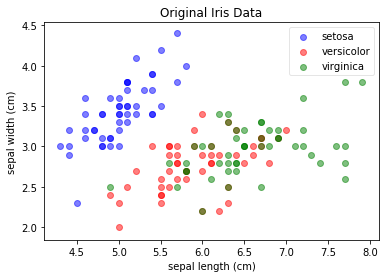

In [61]:
# Let us use only two features to label the flower: {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

label_dict = {i: k for i, k in enumerate(iris.target_names)}

def plot(X, y, title, x_label, y_label):
    ax = plt.subplot(111)
    for label,marker,color in zip(
    range(3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0].real[y == label],
            y=X[:,1].real[y == label],
            color=color,
            alpha=0.5,
            label=label_dict[label]
            )

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)
        
plot(iris_X, iris_y, "Original Iris Data", "sepal length (cm)", "sepal width (cm)")

#### Calculate PCA Manually

1. Create the covariance matrix of the dataset
2. Calculate the eigenvalues of the covariance matrix
3. Keep the top k eigenvalues (sorted by the descending eigenvalues)
4. Use the kept eigenvectors to transform new data-points

In [62]:
import numpy as np

mean_vector = iris_X.mean(axis=0)
print("Mean Vector : ", mean_vector)

Mean Vector :  [5.84333333 3.05733333 3.758      1.19933333]


In [63]:
# We've 4 features viz., sepal length, sepal width, petal length, petal width
# and calculating the covariance between them (pairwise)
# The formula for computing the covariance of the variables X and Y is Cov(X, Y) = Sigma[(X - x)(Y - y)/(n-1)]
# x, y are mean values of Xs, Ys
# We don't compute covariance manually but use numpy

cov_mat = np.cov((iris_X - mean_vector).T)
print("Shape of covariance matrix = ", cov_mat.shape)

Shape of covariance matrix =  (4, 4)


In [64]:
cov_mat

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [65]:
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)
print("Eigen values\n", eig_val_cov)
print("Eigen vectors\n", eig_vec_cov)

Eigen values
 [4.22824171 0.24267075 0.0782095  0.02383509]
Eigen vectors
 [[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [66]:
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:,i]
    print ('Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
    print ('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print (30 * '-')

Eigenvector 1: 
[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
Eigenvalue 1 from covariance matrix: 4.228241706034865
------------------------------
Eigenvector 2: 
[-0.65658877 -0.73016143  0.17337266  0.07548102]
Eigenvalue 2 from covariance matrix: 0.24267074792863422
------------------------------
Eigenvector 3: 
[-0.58202985  0.59791083  0.07623608  0.54583143]
Eigenvalue 3 from covariance matrix: 0.0782095000429193
------------------------------
Eigenvector 4: 
[ 0.31548719 -0.3197231  -0.47983899  0.75365743]
Eigenvalue 4 from covariance matrix: 0.02383509297344963
------------------------------


In [67]:
explained_variance_ratio = eig_val_cov/eig_val_cov.sum()
explained_variance_ratio

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

Text(0, 0.5, '% of Variance Explained <= k')

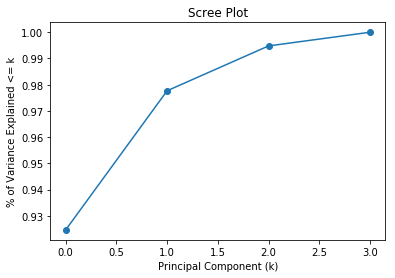

In [68]:
# Scree Plot
plt.plot(np.cumsum(explained_variance_ratio), marker="o")
plt.title('Scree Plot')
plt.xlabel('Principal Component (k)')
plt.ylabel('% of Variance Explained <= k')

In [69]:
top_2_eigenvectors = eig_vec_cov[:, :2].T
top_2_eigenvectors

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102]])

In [70]:
# Calculate dot product to get transformed features w.r.to PCAs
np.dot(iris_X, top_2_eigenvectors.T)[ :5, ]

array([[ 2.81823951, -5.64634982],
       [ 2.78822345, -5.14995135],
       [ 2.61337456, -5.18200315],
       [ 2.75702228, -5.0086536 ],
       [ 2.7736486 , -5.65370709]])

#### Scikit-learn's PCA

In [71]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(iris_X)

# Get top 2 eigen vectors
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [72]:
# Project iris data onto PCAs
# Notice that our projected data does not match up with the projected data we got before at all(in manual procedure above). 
# This is because the scikitlearn version of PCA automatically centers data in the prediction phase, 
# which changes the outcome

pca.transform(iris_X)[:5, ]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [73]:
# We can mimic this by altering a single line in our version to match

np.dot(iris_X-mean_vector, top_2_eigenvectors.T)[:5,]

array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898],
       [-2.72871654, -0.32675451]])

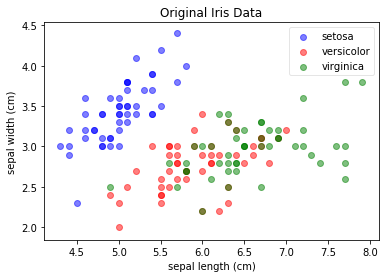

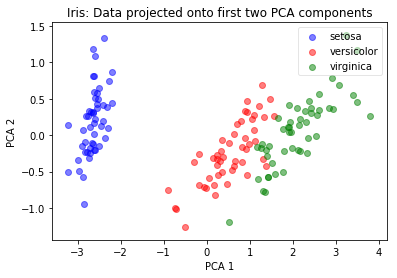

In [74]:
# Let's make a quick plot of the projected iris data and compare what the dataset looks like before and after 
# projecting onto our new coordinate system

plot(iris_X, iris_y, "Original Iris Data", "sepal length (cm)", "sepal width (cm)")
plt.show()

plot(pca.transform(iris_X), iris_y, "Iris: Data projected onto first two PCA components", "PCA 1", "PCA 2")


In [75]:
# Percentage of variance explained by each PCA
# PCA 1 - 92.5 %
# PCA 2 -  5.3 %

pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

#### Linear Discriminant Analysis (LDA) - Manual

In [76]:
# Calculate mean vector of each class

mean_vectors = []
for cl in [0, 1, 2]:
    class_mean_vector = np.mean(iris_X[iris_y == cl], axis = 0)
    mean_vectors.append(class_mean_vector)
    print(label_dict[cl], class_mean_vector)

setosa [5.006 3.428 1.462 0.246]
versicolor [5.936 2.77  4.26  1.326]
virginica [6.588 2.974 5.552 2.026]


In [77]:
# Calculate within-class scatter matrix (SW)

S_W = np.zeros((4, 4))

for cl, mv in zip([0, 1, 2], mean_vectors):
    class_sc_mat = np.zeros((4, 4))
    for row in iris_X[iris_y == cl]:
        row, mv = row.reshape(4, 1), mv.reshape(4, 1)
        class_sc_mat += (row - mv).dot((row - mv).T)
    S_W += class_sc_mat
S_W

array([[38.9562, 13.63  , 24.6246,  5.645 ],
       [13.63  , 16.962 ,  8.1208,  4.8084],
       [24.6246,  8.1208, 27.2226,  6.2718],
       [ 5.645 ,  4.8084,  6.2718,  6.1566]])

In [78]:
# Calculate between-class scatter matrix (SB)

overall_mean = np.mean(iris_X, axis=0).reshape(4, 1)
S_B = np.zeros((4, 4))
for i, mean_vec in enumerate(mean_vectors):
    n = iris_X[iris_y == i, :].shape[0]
    mean_vec = mean_vec.reshape(4, 1)
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
S_B

array([[ 63.21213333, -19.95266667, 165.2484    ,  71.27933333],
       [-19.95266667,  11.34493333, -57.2396    , -22.93266667],
       [165.2484    , -57.2396    , 437.1028    , 186.774     ],
       [ 71.27933333, -22.93266667, 186.774     ,  80.41333333]])

Calculate eigen values and eigen vectors of $S^{-1}_W S_B$

In [79]:
eig_vals, eig_vecs = np.linalg.eig(np.dot(np.linalg.inv(S_W), S_B))
eig_vals = eig_vals.real
eig_vecs = eig_vecs.real

In [80]:
# Note that the 3rd, 4th eigen values are almost zero

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:, i]
    print("Eigen vector ", i+1, " = ", eigvec_sc)
    print("Eigen value", i+1, " = ", eig_vals[i])
    print()

Eigen vector  1  =  [ 0.20874182  0.38620369 -0.55401172 -0.7073504 ]
Eigen value 1  =  32.19192919827801

Eigen vector  2  =  [-0.00653196 -0.58661055  0.25256154 -0.76945309]
Eigen value 2  =  0.2853910426230734

Eigen vector  3  =  [ 0.88493633 -0.28315325 -0.25879109 -0.26408162]
Eigen value 3  =  3.122123344961963e-16

Eigen vector  4  =  [-0.58376426  0.44506636  0.48295873 -0.47737417]
Eigen value 4  =  -6.506451270892598e-15



In [81]:
# Keep the top two linear discriminants

linear_discriminants = eig_vecs.T[:2]

linear_discriminants

array([[ 0.20874182,  0.38620369, -0.55401172, -0.7073504 ],
       [-0.00653196, -0.58661055,  0.25256154, -0.76945309]])

In [82]:
# Explained variance ratios
# Note that first component is doing 99% of the work
eig_vals / eig_vals.sum()

array([ 9.91212605e-01,  8.78739503e-03,  9.61324186e-18, -2.00338304e-16])

In [83]:
# Use the top eigen vectors to project onto new space
lda_iris_projection = np.dot(iris_X, linear_discriminants.T)
lda_iris_projection[:5, ]

array([[ 1.49920971, -1.88675441],
       [ 1.2643595 , -1.59214275],
       [ 1.35525305, -1.73341462],
       [ 1.18495616, -1.62358806],
       [ 1.5169559 , -1.94476227]])

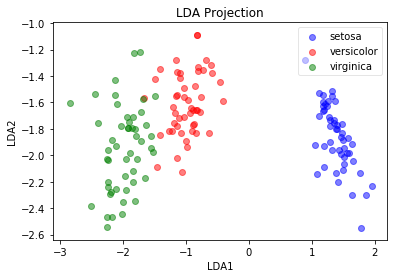

In [84]:
# Notice that in this graph, the data is standing almost fully upright (even more than PCA projected data), 
# as if the LDA components are trying to help machine learning models separate the flowers as much as possible by
# drawing these decision boundaries and providing eigenvectors/linear discriminants. 
# This helps us project data into a space that separates classes as much as possible.

plot(lda_iris_projection, iris_y, "LDA Projection", "LDA1", "LDA2")

#### Linear Discriminant Analysis (LDA) - Scikit Learn

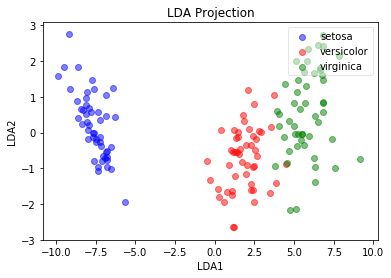

In [85]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# instantiate the LDA module
lda = LinearDiscriminantAnalysis(n_components=2)

# fit and transform our original iris data
X_lda_iris = lda.fit_transform(iris_X, iris_y)

# plot the projected data
plot(X_lda_iris, iris_y, "LDA Projection", "LDA1", "LDA2")

In [86]:
# show that the sklearn components are just a scalar multiplication from the manual components we 
for manual_component, sklearn_component in zip(eig_vecs.T[:2], lda.scalings_.T):
    print (sklearn_component / manual_component)

[-3.97322221 -3.97322221 -3.97322221 -3.97322221]
[-3.68987776 -3.68987776 -3.68987776 -3.68987776]


In [87]:
# same as manual calculations
lda.explained_variance_ratio_

array([0.9912126, 0.0087874])

In [88]:
# essentially the same as pca.components_, but transposed (4x2 instead of 2x4)
lda.scalings_  

array([[-0.82937764,  0.02410215],
       [-1.53447307,  2.16452123],
       [ 2.20121166, -0.93192121],
       [ 2.81046031,  2.83918785]])

In [89]:
# fit our LDA to scaled data
X_lda_iris = lda.fit_transform(X_scaled, iris_y)

NameError: name 'X_scaled' is not defined

In [ ]:
lda.scalings_  # different scalings when data are scaled

In [ ]:
# LDA1 is the best axis for SEPERATING the classes

In [ ]:
# fit our LDA to our truncated iris dataset
iris_2_dim_transformed_lda = lda.fit_transform(iris_2_dim, iris_y)

In [ ]:
# project data
iris_2_dim_transformed_lda[:5,]

In [ ]:
# different notation
components = lda.scalings_.T  # transposing to get same usage as PCA. I want the rows to be our components
print components

np.dot(iris_2_dim, components.T)[:5,]  # same as transform method

In [ ]:
np.corrcoef(iris_2_dim.T)  # original features are highly correllated

In [ ]:
# new LDA features are highly uncorrellated, like in PCA
np.corrcoef(iris_2_dim_transformed_lda.T)  

In [ ]:
# This code is graphing both the original iris data and the projected version of it using LDA.
# Moreover, on each graph, the scalings of the LDA are graphed as vectors on the data themselves
# The longer of the arrows is meant to describe the first scaling vector and
# the shorter of the arrows describes the second scaling vector
def draw_vector(v0, v1, ax):
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(iris_2_dim[:, 0], iris_2_dim[:, 1], alpha=0.2)
for length, vector in zip(lda.explained_variance_ratio_, components):
    v = vector * .5
    draw_vector(lda.xbar_, lda.xbar_ + v, ax=ax[0])  # lda.xbar_ is equivalent to pca.mean_
ax[0].axis('equal')
ax[0].set(xlabel='x', ylabel='y', title='Original Iris Dataset',
         xlim=(-3, 3), ylim=(-3, 3))

ax[1].scatter(iris_2_dim_transformed_lda[:, 0], iris_2_dim_transformed_lda[:, 1], alpha=0.2)
for length, vector in zip(lda.explained_variance_ratio_, components):
    transformed_component = lda.transform([vector])[0]
    v = transformed_component * .1
    draw_vector(iris_2_dim_transformed_lda.mean(axis=0), iris_2_dim_transformed_lda.mean(axis=0) + v, ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='lda component 1', ylabel='lda component 2',
          title='Linear Discriminant Analysis Projected Data',
          xlim=(-10, 10), ylim=(-3, 3))

In [ ]:
# notice how the component, instead of going with the variance of the data
# goes almost perpendicular to it, its following the seperation of the classes instead
# note how its almost parallel with the gap between the flowers on the left and right side
# LDA is trying to capture the separation between classes

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [ ]:
# Create a PCA module to keep a single component
single_pca = PCA(n_components=1)

# Create a LDA module to keep a single component
single_lda = LinearDiscriminantAnalysis(n_components=1)

# Instantiate a KNN model
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# run a cross validation on the KNN without any feature transformation
knn_average = cross_val_score(knn, iris_X, iris_y).mean()

# This is a baseline accuracy. If we did nothing, KNN on its own achieves a 98% accuracy
knn_average

In [ ]:
%%timeit
knn_average = cross_val_score(knn, iris_X, iris_y).mean()

In [ ]:
# create a pipeline that performs PCA
pca_pipeline = Pipeline([('pca', single_pca), ('knn', knn)])

pca_average = cross_val_score(pca_pipeline, iris_X, iris_y).mean()

pca_average

In [ ]:
%%timeit 
cross_val_score(pca_pipeline, iris_X, iris_y).mean()

In [ ]:
lda_pipeline = Pipeline([('lda', single_lda), ('knn', knn)])

lda_average = cross_val_score(lda_pipeline, iris_X, iris_y).mean()

# better prediction accuracy than PCA by a good amount, but not as good as original
lda_average

In [ ]:
%%timeit 
cross_val_score(lda_pipeline, iris_X, iris_y).mean()

In [ ]:
# LDA is much better at creating axes for classification purposes

In [ ]:
# try LDA with 2 components
lda_pipeline = Pipeline([('lda', LinearDiscriminantAnalysis(n_components=2)), 
                         ('knn', knn)])

lda_average = cross_val_score(lda_pipeline, iris_X, iris_y).mean()

# Just as good as using original data
lda_average

In [ ]:
%%timeit
cross_val_score(lda_pipeline, iris_X, iris_y).mean()

In [ ]:
# compare our feature transformation tools to a feature selection tool
from sklearn.feature_selection import SelectKBest
# try all possible values for k, excluding keeping all columns
for k in [1, 2, 3]:
    # make the pipeline
    select_pipeline = Pipeline([('select', SelectKBest(k=k)), ('knn', knn)])
    # cross validate the pipeline
    select_average = cross_val_score(select_pipeline, iris_X, iris_y).mean()
    print k, "best feature has accuracy:", select_average
    
# LDA is even better than the best selectkbest

In [ ]:
%%timeit
cross_val_score(select_pipeline, iris_X, iris_y).mean()

In [ ]:
def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model,           # the model to grid search
                        params,          # the parameter set to try 
                        error_score=0.)  # if a parameter set raises an error, continue and set the performance as a big, fat 0
    grid.fit(X, y)           # fit the model and parameters
    # our classical metric for performance
    print "Best Accuracy: {}".format(grid.best_score_)
    # the best parameters that caused the best accuracy
    print "Best Parameters: {}".format(grid.best_params_)
    # the average time it took a model to fit to the data (in seconds)
    print "Average Time to Fit (s): {}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3))
    # the average time it took a model to predict out of sample data (in seconds)
    # this metric gives us insight into how this model will perform in real-time analysis
    print "Average Time to Score (s): {}".format(round(grid.cv_results_['mean_score_time'].mean(), 3))

In [ ]:
from sklearn.model_selection import GridSearchCV
iris_params = {
                'preprocessing__scale__with_std': [True, False],
                'preprocessing__scale__with_mean': [True, False],
                'preprocessing__pca__n_components':[1, 2, 3, 4], 
                
                # according to scikit-learn docs, max allowed n_components for LDA is number of classes - 1
                'preprocessing__lda__n_components':[1, 2],  
                
                'clf__n_neighbors': range(1, 9)
              }
# make a larger pipeline
preprocessing = Pipeline([('scale', StandardScaler()), 
                          ('pca', PCA()), 
                          ('lda', LinearDiscriminantAnalysis())])


iris_pipeline = Pipeline(steps=[('preprocessing', preprocessing), 
                                ('clf', KNeighborsClassifier())])


In [ ]:
get_best_model_and_accuracy(iris_pipeline, iris_params, iris_X, iris_y)